In [3]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')

from numba import njit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## Damage function

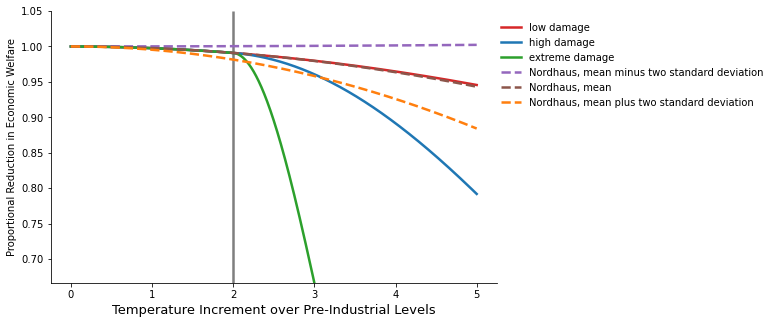

In [2]:
# Plot damage function
y_bar = 2.
γ_1 = 1.7675/10000
γ_2 = .0022*2
γ_3_low = 0
γ_3_high = .0197*2
γ_3_extreme = .3853*2
y_grid = np.linspace(0, 5, 1000)

damage_low = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_low/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_high = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar)*(y_grid-y_bar)**2
damage_extreme = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar)*(y_grid-y_bar)**2

# Compute Nordhaus damage
psi_mean = .00227
psi_std = .00118
damage_nordhaus_mean = 1. - psi_mean*y_grid**2
damage_nordhaus_plus = 1. - (psi_mean + 2*psi_std) * y_grid**2
damage_nordhaus_minus = 1. - (psi_mean - 2*psi_std) * y_grid**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_low), linewidth=2.5, color='tab:red', label='low damage')
plt.plot(y_grid, np.exp(-damage_high), linewidth=2.5, color='tab:blue', label='high damage')
plt.plot(y_grid, np.exp(-damage_extreme), linewidth=2.5, color='tab:green', label='extreme damage')
plt.plot(y_grid, damage_nordhaus_minus, linewidth=2.5, color='tab:purple', linestyle='dashed', label='Nordhaus, mean minus two standard deviation')
plt.plot(y_grid, damage_nordhaus_mean, linewidth=2.5, color='tab:brown', linestyle='dashed', label='Nordhaus, mean')
plt.plot(y_grid, damage_nordhaus_plus, linewidth=2.5, color='tab:orange', linestyle='dashed', label='Nordhaus, mean plus two standard deviation')

plt.ylim(2./3, 1.05)
plt.vlines(2., ymin=2./3, ymax=1.05, color='tab:grey', linewidth=2.5)
plt.xlabel('Temperature Increment over Pre-Industrial Levels', fontsize=13)
plt.ylabel('Proportional Reduction in Economic Welfare')
plt.legend(frameon=False, loc=(1., .63))
plt.savefig('../plots/damage_plot.pdf')

## Comparison of damage funciton over choices of y_bar

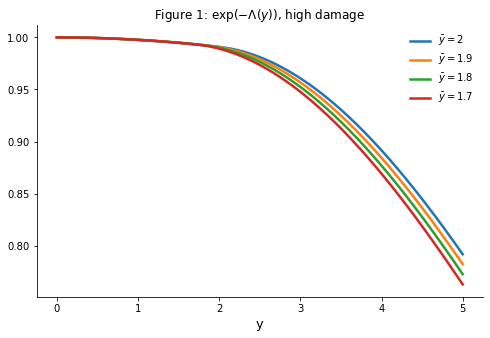

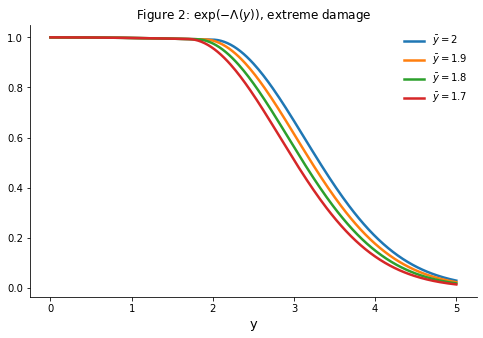

In [19]:
# Plot damage function
y_bar_0 = 2.
y_bar_1 = 1.9
y_bar_2 = 1.8
y_bar_3 = 1.7

γ_1 = 1.7675/10000
γ_2 = .0022*2
γ_3_low = 0
γ_3_high = .0197*2
γ_3_extreme = .3853*2
y_grid = np.arange(0, 5+.02, .02)

damage_low = γ_1*y_grid + γ_2/2.*y_grid**2

# High damage
damage_high_0 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar_0)*(y_grid-y_bar_0)**2
damage_high_1 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar_1)*(y_grid-y_bar_1)**2
damage_high_2 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar_2)*(y_grid-y_bar_2)**2
damage_high_3 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_high/2.*(y_grid>y_bar_3)*(y_grid-y_bar_3)**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_high_0), linewidth=2.5, label=r'$\bar{y}=2$')
plt.plot(y_grid, np.exp(-damage_high_1), linewidth=2.5, label=r'$\bar{y}=1.9$')
plt.plot(y_grid, np.exp(-damage_high_2), linewidth=2.5, label=r'$\bar{y}=1.8$')
plt.plot(y_grid, np.exp(-damage_high_3), linewidth=2.5, label=r'$\bar{y}=1.7$')

plt.xlabel('y', fontsize=13)
plt.legend(frameon=False)
plt.title(r'Figure 1: $\exp(-\Lambda(y))$, high damage')
plt.savefig('../plots/high_damage.pdf')

# Extreme damage
damage_extreme_0 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar_0)*(y_grid-y_bar_0)**2
damage_extreme_1 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar_1)*(y_grid-y_bar_1)**2
damage_extreme_2 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar_2)*(y_grid-y_bar_2)**2
damage_extreme_3 = γ_1*y_grid + γ_2/2.*y_grid**2 + γ_3_extreme/2.*(y_grid>y_bar_3)*(y_grid-y_bar_3)**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_extreme_0), linewidth=2.5, label=r'$\bar{y}=2$')
plt.plot(y_grid, np.exp(-damage_extreme_1), linewidth=2.5, label=r'$\bar{y}=1.9$')
plt.plot(y_grid, np.exp(-damage_extreme_2), linewidth=2.5, label=r'$\bar{y}=1.8$')
plt.plot(y_grid, np.exp(-damage_extreme_3), linewidth=2.5, label=r'$\bar{y}=1.7$')

plt.xlabel('y', fontsize=13)
plt.legend(frameon=False)
plt.title(r'Figure 2: $\exp(-\Lambda(y))$, extreme damage')
plt.savefig('../plots/extreme_damage.pdf')

## Modificaiton of damage functions

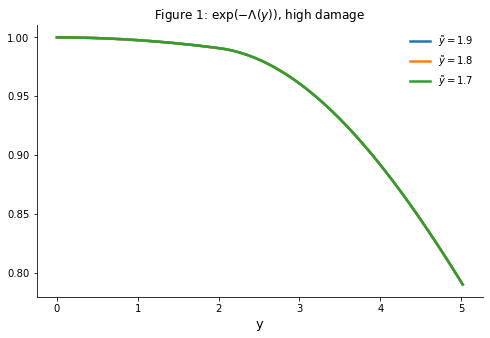

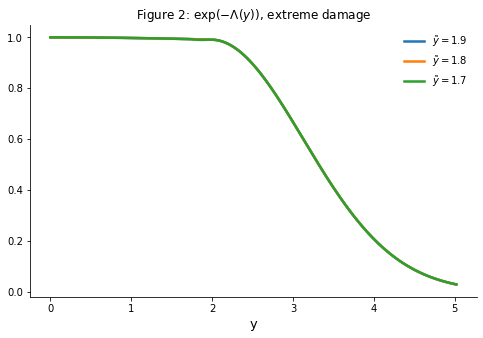

In [31]:
# Plot damage function
y_bar = 2.
y_tilde_1 = 1.9
y_tilde_2 = 1.8
y_tilde_3 = 1.7

γ_1 = 1.7675/10000
γ_2 = .0022*2
γ_3_low = 0
γ_3_high = .0197*2
γ_3_extreme = .3853*2
y_grid = np.arange(0, 5+.02, .001)

damage_high_1 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_high/2.*(y_grid>y_tilde_1)*((y_grid-y_tilde_1)/(y_bar-y_tilde_1))**2*(y_bar-y_grid)**2\
                + γ_3_high/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_1)/(y_bar-y_tilde_1))**2)*(y_bar-y_grid)**2
damage_high_2 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_high/2.*(y_grid>y_tilde_2)*((y_grid-y_tilde_2)/(y_bar-y_tilde_2))**2*(y_bar-y_grid)**2\
                + γ_3_high/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_2)/(y_bar-y_tilde_2))**2)*(y_bar-y_grid)**2
damage_high_3 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_high/2.*(y_grid>y_tilde_3)*((y_grid-y_tilde_3)/(y_bar-y_tilde_3))**2*(y_bar-y_grid)**2\
                + γ_3_high/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_3)/(y_bar-y_tilde_3))**2)*(y_bar-y_grid)**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_high_1), linewidth=2.5, label=r'$\tilde{y}=1.9$')
plt.plot(y_grid, np.exp(-damage_high_2), linewidth=2.5, label=r'$\tilde{y}=1.8$')
plt.plot(y_grid, np.exp(-damage_high_3), linewidth=2.5, label=r'$\tilde{y}=1.7$')

plt.xlabel('y', fontsize=13)
plt.legend(frameon=False)
plt.title(r'Figure 1: $\exp(-\Lambda(y))$, high damage')
plt.savefig('../plots/high_damage.pdf')

# Extreme damage
damage_extreme_1 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_extreme/2.*(y_grid>y_tilde_1)*((y_grid-y_tilde_1)/(y_bar-y_tilde_1))**2*(y_bar-y_grid)**2\
                + γ_3_extreme/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_1)/(y_bar-y_tilde_1))**2)*(y_bar-y_grid)**2
damage_extreme_2 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_extreme/2.*(y_grid>y_tilde_2)*((y_grid-y_tilde_2)/(y_bar-y_tilde_2))**2*(y_bar-y_grid)**2\
                + γ_3_extreme/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_2)/(y_bar-y_tilde_2))**2)*(y_bar-y_grid)**2
damage_extreme_3 = γ_1*y_grid + γ_2/2.*y_grid**2\
                + γ_3_extreme/2.*(y_grid>y_tilde_3)*((y_grid-y_tilde_3)/(y_bar-y_tilde_3))**2*(y_bar-y_grid)**2\
                + γ_3_extreme/2.*(y_grid>y_bar)*(1-((y_grid-y_tilde_3)/(y_bar-y_tilde_3))**2)*(y_bar-y_grid)**2

plt.figure(figsize=(8, 5))
plt.plot(y_grid, np.exp(-damage_extreme_1), linewidth=2.5, label=r'$\tilde{y}=1.9$')
plt.plot(y_grid, np.exp(-damage_extreme_2), linewidth=2.5, label=r'$\tilde{y}=1.8$')
plt.plot(y_grid, np.exp(-damage_extreme_3), linewidth=2.5, label=r'$\tilde{y}=1.7$')

plt.xlabel('y', fontsize=13)
plt.legend(frameon=False)
plt.title(r'Figure 2: $\exp(-\Lambda(y))$, extreme damage')
plt.savefig('../plots/extreme_damage.pdf')